<a href="https://colab.research.google.com/github/lauracline/Statistical-Learning-Cookbooks/blob/master/Moving_Beyond_Linearity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Moving Beyond Linearity** 

Linearity is always an approximation, need more flexible models. 

## **Polynomial Regression**

Extend linear model with polynomial terms. It's still a linear model but can model non-linear data. Usually don't use polynomial terms higher than degree 3 or 4. 

## **Step Functions**

Cut X into K different regions and fit a constant to each region. The model reduces to $\hat{y} = \beta_{0} + \beta_{k}$ where k is the kth region. $\beta_{0}$ is just the estimate for y (the mean) in the region before the first cut point. Can use same approach for logistic regression to geet a flat probability estimate for each region. 

## **Basis Functions**

Polynomial terms and step function are both types of basis functions. A basis function is a function that transforms X. For polynomial regression, that is simply raising X to a power and for step functions this is transforming X into 0 or 1 based on whether X is in a region or not (indicator variable). Wavelets and fourier series are also basis functions. 

## **Regression Splines**

Combining piecewise functions and polynomial regression. 

### **Piecewise Polynomials**

Fit low degree polynomials over different regions of X. The place where the region ends are called knots. Without constraints the many pieces will not connect - be continuous. 

### **Splines**

Piecewise polynomials with constraints that the curves be continuouse and smooth - meaning both first and second derivatives must match at the knot. Fitting a spline turns out to be surprisingly simpler than it seems. We don't have to fit a 3 degree polynomial for each region. By smartly choosing basis functions, we can use least squares to solve for all the coefficients. We use the truncated power basis function which is $h(x, \zeta) = (x - \zeta)^{3}, x > \zeta$ and 0 otherwise. Each $\zeta$ is a knot. 

The equation to send to least squares is $\hat{y} = \beta_{0} + \beta_{1}X + \beta_{2}X^{2} + \beta_{3}X^{3} + h(x, \zeta_{k}) +...$ where we have K truncated power transformations for a total of K + 4 predictors. 

### **How to Choose K**

Cross validation 

### **Splines Vs. Polynomial Regression**

Splines generally do better. A complex fit can still be fit well with a 3 degree spline, but it could take a very high degree polynomial to do the same, but with a worst variance. 

## **Smoothing Splines**

Finding a function that minimizes RSS but that is 'smooth'. Smoothness here is defined as having a relatively stable derivative. Ise a penalty term on the sum (integral) of the squared second derivative. We want smoothness (i.e., stable second derivative). 

The function that minimizes this error is a natural cubic spline with knots at each unique value of x but with shrunken parameter estimates due to the penalty term. The smoothing parameter is very important to control variance. Choose smoothing parameter with cross-validation. 

## **Local Regression**

Fits a new regression line to each point by using the nearest neighbours of that point. It uses weighted least squares, weighting points at the boundary and beyond 0 and points in the boundary a decreasing function of its distance to the point. Usually, small degree polynomials are fit to these local points. Need to choose weight function and span of points. The larger span of points the smoother the function you will get. 

Can even due to local regression with pairs or more of variables, but because of the curse of dimensionality, there might not be enough neighbours. 

## **General Additive Models**

The above models all relate to single variable predictions. GAMs simply add different linear models above (like the one above) for different variables in the model, allowing for multivariate regression/classification. Each variable gets its own model and is added together. Each own model is a building block for a GAM. 

## **Lab: Polynomial Regression and Step Functions**

In [1]:
import pandas as pd
import numpy as np

In [2]:
wage = pd.read_csv("https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Wage.csv")

In [3]:
# Use sklearn to get regression coefficients 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [4]:
poly = PolynomialFeatures(degree=4, include_bias=False)

In [5]:
X = wage[['age']]
y = wage['wage']

In [6]:
model = LinearRegression()

In [7]:
model.fit(poly.fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [8]:
# Coefficients are the same as in ISLR
model.intercept_, model.coef_

(-184.1541797729099,
 array([ 2.12455205e+01, -5.63859313e-01,  6.81068771e-03, -3.20383037e-05]))

### **Standard Error in Scikit-Learn**

Sklearn doesn't supply the standard error, so you will have to write the formula yourself or use statsmodels. 

In [9]:
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
results = smf.ols('wage ~ age + np.power(age,2) + np.power(age, 3) + np.power(age,4)', data=wage).fit()

In [11]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           2.77e-57
Time:                        12:44:45   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [12]:
results.bse

Intercept           60.040377
age                  5.886748
np.power(age, 2)     0.206108
np.power(age, 3)     0.003066
np.power(age, 4)     0.000016
dtype: float64

In [13]:
results.conf_int()

,0,1
Intercept,-301.878732,-6.642963e+01
age,9.703041,3.278800e+01
"np.power(age, 2)",-0.967987,-1.597312e-01
"np.power(age, 3)",0.000799,1.282223e-02
"np.power(age, 4)",-0.000064,1.447431e-07


### **Confidence Interval for the Mean**

There are different confidence intervals for the mean (the regression line) and prediction. Prediction intervals are going to be much wider. The regression line will not wiggle around so much. 

In [14]:
from statsmodels.stats.outliers_influence import summary_table

In [15]:
st, data, ss2 = summary_table(results, alpha=0.05)

In [16]:
fittedvalues = data[:,2]
predict_mean_se = data[:,3]
predict_mean_ci_low, predict_mean_ci_upp = data[:,4:6].T

In [17]:
order = np.argsort(X.values.flatten())
x_o = X.values.flatten()[order]

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

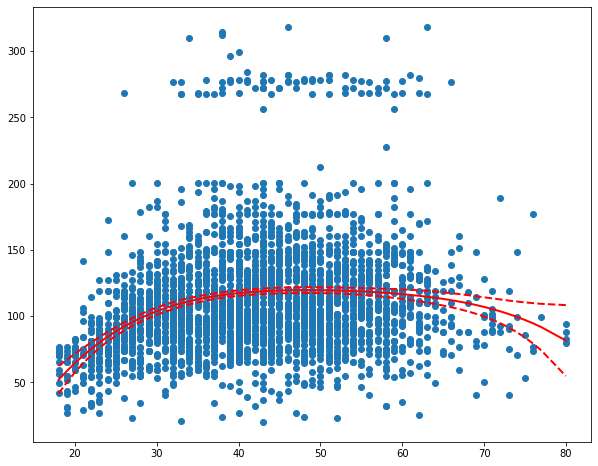

In [19]:
plt.figure(figsize=(10,8))
plt.scatter(x_o, y[order])
plt.plot(x_o, fittedvalues[order], 'r', lw=2)
plt.plot(x_o, predict_mean_ci_low[order], 'r--', lw=2)
plt.plot(x_o, predict_mean_ci_upp[order], 'r--', lw=2)

In [20]:
# Which features are necessary
smf.ols('wage ~ age + np.power(age, 2) + np.power(age,3) + np.power(age, 4)', data=wage).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.086
Model:                            OLS   Adj. R-squared:                  0.085
Method:                 Least Squares   F-statistic:                     70.69
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           2.77e-57
Time:                        12:45:04   Log-Likelihood:                -15315.
No. Observations:                3000   AIC:                         3.064e+04
Df Residuals:                    2995   BIC:                         3.067e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -184.1542     60.040     -3.067      0.002    -301.879     -66.430
age                 21.2455      5.887      3.609      0.000       9.703      32.788
np.power(age, 2)    -0.5639      0.206     -2.736      0.006      -0.968      -0.160
np.power(age, 3)     0.0068      0.003      2.221      0.026       0.001       0.013
np.power(age, 4) -3.204e-05   1.64e-05     -1.952      0.051   -6.42e-05    1.45e-07
==============================================================================
Omnibus:                     1097.594   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4965.521
Skew:                           1.722   Prob(JB):                         0.00
Kurtosis:                       8.279   Cond. No.                     5.67e+08
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.67e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [21]:
from statsmodels.stats.api import anova_lm

### **Use Anova to Test Whether Each Additional Polynomial Term is Significant**

Models must be nested here, meaning that mod2 must be a superset of mod1. 

In [22]:
mod1 = smf.ols('wage ~ age', data=wage).fit()
mod2 = smf.ols('wage ~ age + np.power(age,2)', data=wage).fit()
mod3 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3)', data=wage).fit()
mod4 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3) + np.power(age,4)', data=wage).fit()
mod5 = smf.ols('wage ~ age + np.power(age,2) + np.power(age,3) + np.power(age,4) + np.power(age,5)', data=wage).fit()

In [23]:
# Same as ISLR
# Polynomial terms 4 and 5 are not needed. p > 0.05
anova_lm(mod1, mod2, mod3, mod4, mod5)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,2998.0,5.022216e+06,0.0,NaN,NaN,NaN
1,2997.0,4.793430e+06,1.0,228786.010128,143.593107,2.363850e-32
2,2996.0,4.777674e+06,1.0,15755.693664,9.888756,1.679202e-03
3,2995.0,4.771604e+06,1.0,6070.152124,3.809813,5.104620e-02
4,2994.0,4.770322e+06,1.0,1282.563017,0.804976,3.696820e-01


### **Logistic Regression**

Prediction of greater than $250,000 income. 

In [24]:
wage['wage_250'] = (wage['wage'] > 250) * 1 

In [25]:
results = smf.logit('wage_250 ~ age + np.power(age,2) + np.power(age,3) + np.power(age,4)', data=wage).fit()

Optimization terminated successfully.
         Current function value: 0.116870
         Iterations 12


In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               wage_250   No. Observations:                 3000
Model:                          Logit   Df Residuals:                     2995
Method:                           MLE   Df Model:                            4
Date:                Sat, 30 Oct 2021   Pseudo R-squ.:                 0.04013
Time:                        12:45:13   Log-Likelihood:                -350.61
converged:                       True   LL-Null:                       -365.27
Covariance Type:            nonrobust   LLR p-value:                 6.747e-06
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         -109.5530     47.655     -2.299      0.022    -202.956     -16.150
age                  8.9950      4.187      2.148      0.032       0.789      17.201
np.power(age, 2)    -0.2816      0.135     -2.081      0.037      -0.547      -0.016
np.power(age, 3)     0.0039      0.002      2.022      0.043       0.000       0.008
np.power(age, 4) -1.949e-05   9.91e-06     -1.966      0.049   -3.89e-05   -6.41e-08
====================================================================================
"""

In [27]:
y_hat = np.exp(results.fittedvalues)
y = wage['wage_250'].values
x = X['age'].values
x_mean = x.mean()
n = len(y)

In [28]:
sy = np.sqrt(np.sum((y - y_hat)**2) / (n - 2))
sx = np.sum((x - x_mean)**2) / n
x_s = (x - x_mean)**2

In [29]:
sx = np.sum(x ** 2) - (x.sum() ** 2) / n

In [30]:
err = sy * np.sqrt(1/n + x_s / x_s.sum())

In [31]:
order = np.argsort(x)
x_o = x[order]

(0.0, 0.07)

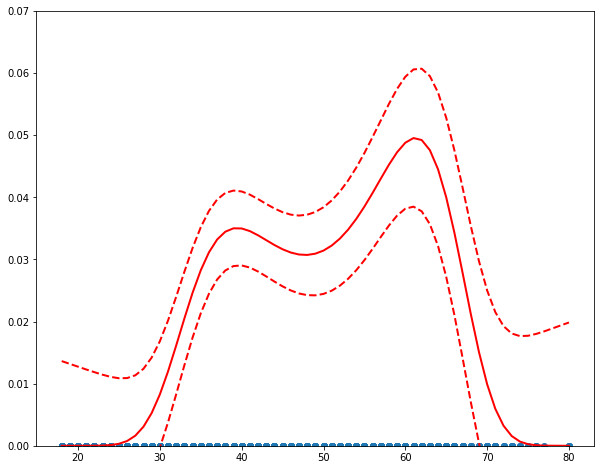

In [32]:
plt.figure(figsize=(10,8))
plt.scatter(x_o, y[order])
plt.plot(x_o, y_hat[order], 'r', lw=2)
plt.plot(x_o, y_hat[order] + 2 * err[order], 'r--', lw=2)
plt.plot(x_o, y_hat[order] - 2 * err[order], 'r--', lw=2)
plt.ylim(0, 0.07)

### **Step function**

Use pd.cut

In [33]:
results = smf.ols('wage ~ pd.cut(age,4)', data=wage).fit()

In [34]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.062
Method:                 Least Squares   F-statistic:                     66.58
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.13e-41
Time:                        12:45:21   Log-Likelihood:                -15353.
No. Observations:                3000   AIC:                         3.071e+04
Df Residuals:                    2996   BIC:                         3.074e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==========================================================================================================================
                                                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------------
Intercept                                                 94.1584      1.476     63.790      0.000      91.264      97.053
pd.cut(age, 4)[T.Interval(33.5, 49.0, closed='right')]    24.0535      1.829     13.148      0.000      20.466      27.641
pd.cut(age, 4)[T.Interval(49.0, 64.5, closed='right')]    23.6646      2.068     11.443      0.000      19.610      27.719
pd.cut(age, 4)[T.Interval(64.5, 80.0, closed='right')]     7.6406      4.987      1.532      0.126      -2.139      17.420
==============================================================================
Omnibus:                     1062.354   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.200
Skew:                           1.681   Prob(JB):                         0.00
Kurtosis:                       8.011   Cond. No.                         7.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## **Lab: Splines**

In [35]:
import scipy.interpolate as si

In [36]:
y = wage['wage'].values

In [37]:
order = np.argsort(x)

In [38]:
x_sort = x[order]
y_sort = y[order]
t = np.array([25, 40, 60])

In [39]:
spl  = si.LSQUnivariateSpline(x_sort, y_sort, t)

In [40]:
spl(x_sort)

array([60.49371419, 60.49371419, 60.49371419, ..., 77.09985645,
       77.09985645, 77.09985645])

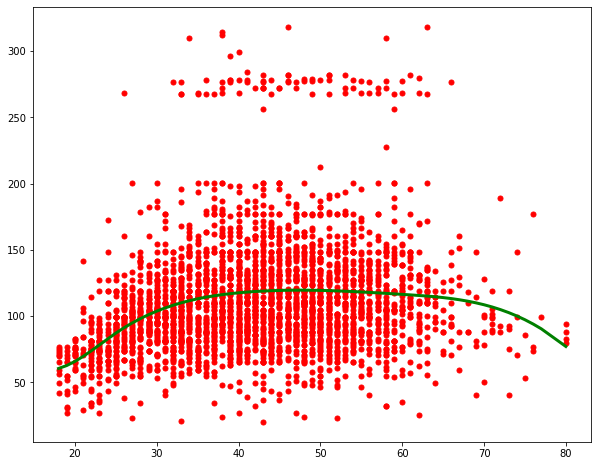

In [41]:
plt.figure(figsize=(10,8))
plt.plot(x_sort, y_sort, 'ro', ms=5)
plt.plot(x_sort, spl(x_sort), 'g-', lw=3)

## **Lab: General Additive Models in Python**

Not much avaliable. Best to use R. 

## **Excercises**

### **Question One**

It was mentioned in the chapter that a cubic regression apline with one knot at $\zeta$ can be obtained using a basis of the form $x, x^{2}, x^{3}, (x - \zeta)^{3}_{+}$, where $(x - \zeta)^{3}_{+} = (x - \zeta)^{3}$ if $x > \zeta$ and equals 0 otherwise. We will now show that a function of the form:

$f(x) = \beta_{0} = \beta_{1}x + \beta_{2}x^{2} + \beta_{3}x^{3} + \beta_{4}(x - \zeta)^{3}_{+}$

is indeed a cubic regression spline, regardless of the values of $\beta_{0}$, $\beta_{1}$. $\beta_{2}$, $\beta_{3}$ or $\beta_{4}$.

A. Find a cubic polynomial 

$f_{1}(x) = a_{1} + b_{1}x + c_{1}x^{2} + d_{1}x^{3}$

such that $f(x) = f_{1}(x)$ for all $x \le \zeta$. Express a_{1}, b_{1}, c_{1} and d_{1} in terms of $\beta_{0}$, $\beta_{1}$. $\beta_{2}$, $\beta_{3}$ and $\beta_{4}$.

**Answer:** Since $x < \zeta$ then $a_{1} = \beta_{0}$ and $b_{1} = \beta_{1}$ and $c_{1} = \beta_{2}$ and $d_{1} = \beta_{3}$.

B. Find the cubic polynomial

$f_{2}(x) = a_{2} + b_{2}x + c_{2}x^{2} + d_{2}x^{3}$

such that $f(x) = f_{2}(x)$ for all $x > \zeta$. Express a_{2}, b_{2}, c_{2} and d_{2} in terms of $\beta_{0}$, $\beta_{1}$, $\beta_{2}$, $\beta_{3}$ and $\beta_{4}$. We have now established that f(x) is a piecewise polynomial. 



**Answer:** Must expand expression and group like polynomial terms. $a_{1} = \beta_{0} - \beta_{4}\zeta^{3}$ and $b_{1} = \beta_{1} + \beta_{4}\zeta^{2}$ and $c_{1} = \beta_{2} - 3\beta_{4}\zeta$ and $d_{1} = \beta_{3} + \beta_{4}$.

C. Show that $f_{1}(\zeta) = f_{2}(\zeta)$. That is, f(x) is continuouse at $\zeta$. 

**Answer:** When $x = \zeta$ the spline term equals 0 for both equations and thus they are equal. 

D. Show $f_{1}^{'}(\zeta) = f_{2}^{'}(\zeta)$. That is, $f_{x}^{'}$ is continous at $\zeta$. 

**Answer:**  If they are equal, then their derivatives must also be equal. 

E. Show $f_{1}^{''}(\zeta) = f_{2}^{''}(\zeta)$. That is, $f_{x}^{''}$ is continous at $\zeta$. 

**Answer:** If they are equal, then their derivatives must also be equal. 

### **Question Two**

Suppose that a curve $\hat{g}$ is computed to smoothly fit a set of *n* points using the following formula:

$\hat{g} = argmin_{g}(\sum_{i=1}^{n}(y_{i} - g(x_{i}))^{2} + \lambda \int[g^{(m)}(x)]^{2}x)$,

where $g^{(m)}$ represents the *m*th derivative of g (and $g^{(0)} = g$). Provide example sketches of $\hat{g}$ in each of the following scenarios. 

A. $\lambda = \infty, m = 0$

**Answer:** g = 0

B. $\lambda = \infty, m = 1$

**Answer:** g = mean(y)

C. $\lambda = \infty, m = 2$

**Answer:** g = linear regression with two parameters - slope and intercept. 

D. $\lambda = \infty, m = 3$

**Answer:** g = cubic term in regression with three parameters. 

E. $\lambda = 0, m = 3$

**Answer:** Very high dimensional function that gives nearly zero training error. 

### **Question Three**

Suppose we fit a curve with basis functions $b_{1}(X) = X, b_{2}(X) = (X - 1)^{2}I(X \ge 1)$.  Bote that $I(X \ge 1)$ equals 1 for $X \ge 1$ and 0 otherwise. We fit the linear regression model

$Y = \beta_{0} + \beta_{1}b_{1}(X) + \beta_{2}b_{2}(X) + \epsilon$,

and obtain coefficient estimates $\hat{\beta_{0}} = 1$, $\hat{\beta_{1}} = 1$ and $\hat{\beta_{2}} = -2$. Skech the esttimated curve between X = -2 and X = 2. Note the intercepts, slopes and other relevant information. 

In [42]:
x = np.linspace(-2, 2, 100)

In [43]:
y = 1 + x + -2 * (x - 1)**2 * (x >= 1)

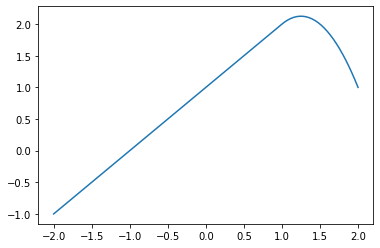

In [44]:
plt.plot(x,y)

### **Question Four**

Suppose we fit a curve with basis functions $b_{1}(X) = I(0 \le X \le 2) - (X - 1)I(1 \le X \le 2)$, $b_{2}(X) = (X - 3)I(3 \le X \le 4) + I(4 < X \le 5$. We fit the linear regression model

$Y = \beta_{0} + \beta_{1}b_{1}(X) + \beta_{2}b_{2}(X) + \epsilon$,

and obtain the coefficient estimates $\hat{\beta_{0}} = 1$, $\hat{\beta_{1}} = 1$ and $\hat{\beta_{0}} = 3$. Sketch the estimated curve between X = -2 and X = 2. Note the intercepts, slopes and other relevant information. 


In [45]:
b1_1 = (0 <= x) & (x <= 2)
b1_2 = (1 <= x) & (x <= 2)
b2_1 = (3 <= x) & (x <= 4)
b2_2 = (4 < x) & (x <= 5)

In [46]:
y = 1 + b1_1 - (x - 1) * b1_2 + (x - 3) * b2_1 + b2_2

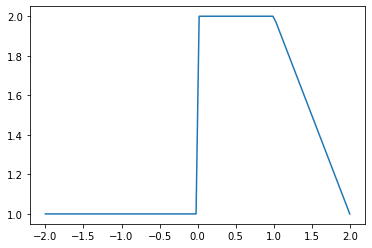

In [47]:
plt.plot(x, y)

### **Question Five**

Consider two cirves $\hat{g_{1}}$ and $\hat{g_{2}}$, defined by 

$\hat{g_{1}} =  argmin_{g}(\sum_{i=1}^{n}(y_{i} - g(x_{i}))^{2} + \lambda \int[g^{(3)}(x)]^{2}x)$,

$\hat{g_{2}} =  argmin_{g}(\sum_{i=1}^{n}(y_{i} - g(x_{i}))^{2} + \lambda \int[g^{(4)}(x)]^{2}x)$, 

where $g^{(m)}$ represents the *m*th derivative of *g*. 

A. As $\lambda \rightarrow \infty$, will $\hat{g_{1}}$ or $\hat{g_{2}}$ have the smaller training RSS?

**Answer:** $\hat{g_{2}}$ will have the smaller training error since it is allowing more flexibility. It can have up to a cubic model. $\hat{g_{1}}$ will be limited to a quadratic model as $\lambda$ approaches infinity. 

B. As $\lambda \rightarrow \infty$, will $\hat{g_{1}}$ or $\hat{g_{2}}$ have the smaller test RSS?

**Answer:** Can't tell which model will have smaller test error this depends on the 'true' relationship between x and y. 

C. For $\lambda = 0$, will $\hat{g_{1}}$ or $\hat{g_{2}}$ have the smaller training and test RSS?

**Answer:** $\hat{g_{1}}$ and $\hat{g_{2}}$ will be the same model if there is no penalty.

### **Question Six**

In this exercise, you will further analyze the `Wage` dataset. 

A. Perform polynomial regression to predict `wage` using `age`. Use cross-validation to select the optimal degree *d* for the polynomial. What degree was chosen, and how does this compare to the results of hypothesis testing using ANOVA? Make the plot of the resulting polynomial fit to the data. 

In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection

In [49]:
degrees = range(1,11)
X = wage[['age']]
y = wage['wage']
final_scores = []

for degree in degrees:
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  linear_regression = LinearRegression()
  pipeline = Pipeline([("polynomial_features", polynomial_features), ("linear_regression", linear_regression)])
  scores = model_selection.cross_val_score(pipeline, X, y, cv=10, scoring="neg_mean_squared_error")
  final_scores.append(-np.mean(scores))

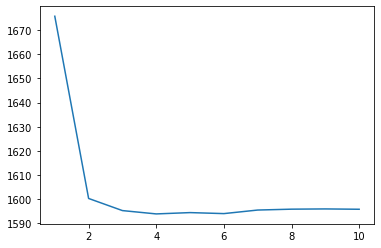

In [50]:
# Degree 3 chosen through 10-fold CV
plt.plot(degrees, final_scores)

In [51]:
# Compare to anova: already done above. More evidence that 4th and 5th degree polynomial are not needed 

In [52]:
polynomial_features = PolynomialFeatures(degree = 3, include_bias=False)
linear_regression.fit(polynomial_features.fit_transform(X), y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [53]:
x = np.linspace(X.values.min(), X.values.max(), 1000)

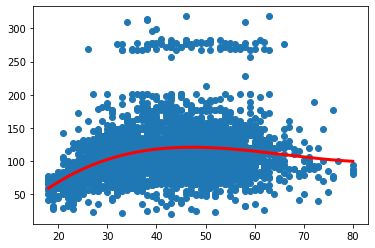

In [54]:
plt.scatter(X,y)
plt.plot(x, linear_regression.predict(polynomial_features.fit_transform(x.reshape(-1, 1))), c='r', lw=3)

B. Fit a step function to predict `wage` using `age`, and perform cross-validation to choose the optimal number of cuts. Make a plot of the fit obtained. 

In [55]:
cuts = range(1,41)
X = wage[['age']]
y = wage['wage']
final_scores = []

for cut in cuts:
  X_new = pd.get_dummies(pd.cut(X['age'], cut)).values
  linear_regression = LinearRegression(fit_intercept=False)
  scores = model_selection.cross_val_score(linear_regression, X_new, y, cv=10, scoring='neg_mean_squared_error')
  final_scores.append(-np.mean(scores))

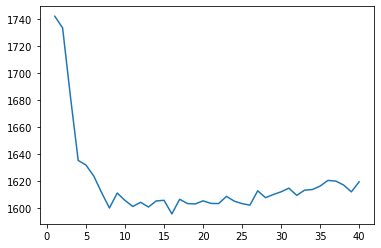

In [56]:
# Looks like error stops getting better after 7 cuts
plt.plot(cuts, final_scores)

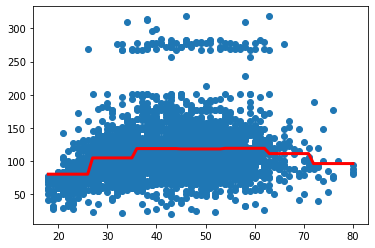

In [57]:
X_new = pd.get_dummies(pd.cut(X['age'], 7)).values
linear_regression = LinearRegression(fit_intercept=False)
linear_regression.fit(X_new, y)
plt.scatter(X,y)
order = np.argsort(X['age'])
plt.plot(X['age'].values[order], linear_regression.predict(X_new[order]), c='r', lw=3)

### **Question Seven**

The `Wage` dataset contains a number of other features not explored in this chapter, such as marital status (`marital`), job class (`jobclass`), and others. Explore the relationships between some of these other predictors and `wage`, and use non-linear fitting techniques in order to fit flexible models to the data. Create plots of the results obtained, and write a summary of your findings. 

In [58]:
wage = pd.read_csv("https://raw.githubusercontent.com/emredjan/ISL-python/master/datasets/Wage.csv")

In [59]:
wage[['maritl', 'jobclass']].head()

,maritl,jobclass
0,1. Never Married,1. Industrial
1,1. Never Married,2. Information
2,2. Married,1. Industrial
3,2. Married,2. Information
4,4. Divorced,2. Information


In [60]:
X = pd.get_dummies(wage[['maritl', 'jobclass']], drop_first=False)
y = wage['wage']

In [61]:
X.head()

,maritl_1. Never Married,maritl_2. Married,maritl_3. Widowed,maritl_4. Divorced,maritl_5. Separated,jobclass_1. Industrial,jobclass_2. Information
0,1,0,0,0,0,1,0
1,1,0,0,0,0,0,1
2,0,1,0,0,0,1,0
3,0,1,0,0,0,0,1
4,0,0,0,1,0,0,1


In [62]:
linear_regression = LinearRegression(fit_intercept=True)
linear_regression.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [63]:
linear_regression.coef_

array([ 6.40519198e+14,  6.40519198e+14,  6.40519198e+14,  6.40519198e+14,
        6.40519198e+14, -2.75162551e+13, -2.75162551e+13])

In [64]:
linear_regression.intercept_

-613002943380219.6

In [65]:
import statsmodels.api as smf

In [66]:
results_orig = smf.OLS(y, X).fit()
results_orig.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.109
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     72.98
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           2.67e-72
Time:                        12:46:01   Log-Likelihood:                -15277.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2994   BIC:                         3.060e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
maritl_1. Never Married    19.5438      2.045      9.557      0.000      15.534      23.553
maritl_2. Married          44.8996      1.733     25.911      0.000      41.502      48.297
maritl_3. Widowed          27.6804      7.806      3.546      0.000      12.374      42.987
maritl_4. Divorced         29.2079      2.813     10.385      0.000      23.693      34.723
maritl_5. Separated        26.7328      4.761      5.616      0.000      17.399      36.067
jobclass_1. Industrial     65.7707      1.714     38.368      0.000      62.410      69.132
jobclass_2. Information    82.2939      1.742     47.228      0.000      78.877      85.710
==============================================================================
Omnibus:                     1049.154   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4551.093
Skew:                           1.652   Prob(JB):                         0.00
Kurtosis:                       8.049   Cond. No.                     1.23e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.2e-27. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [67]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean() 

97.10906713345983

In [68]:
wage[wage['maritl'] == '1. Never Married']['wage'].mean()

92.73464859222041

In [69]:
wage[wage['jobclass']  == '1. Industrial']['wage'].mean()

103.32112881497488

In [70]:
wage[wage['jobclass'] == '2. Information']['wage'].mean()

120.59272095804255

In [71]:
wage['jobclass'].value_counts()

1. Industrial     1544
2. Information    1456
Name: jobclass, dtype: int64

In [72]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [73]:
27.6 + 82.3

109.9

In [74]:
X = pd.get_dummies(wage['maritl'] + ' ' + wage['jobclass'])
y = wage['wage']

In [75]:
results = smf.OLS(y, X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   wage   R-squared:                       0.110
Model:                            OLS   Adj. R-squared:                  0.107
Method:                 Least Squares   F-statistic:                     40.91
Date:                Sat, 30 Oct 2021   Prob (F-statistic):           1.97e-69
Time:                        12:46:01   Log-Likelihood:                -15276.
No. Observations:                3000   AIC:                         3.057e+04
Df Residuals:                    2990   BIC:                         3.063e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
1. Never Married 1. Industrial     84.6314      2.087     40.551      0.000      80.539      88.724
1. Never Married 2. Information   102.6758      2.312     44.417      0.000      98.143     107.208
2. Married 1. Industrial          110.5215      1.219     90.645      0.000     108.131     112.912
2. Married 2. Information         127.3450      1.230    103.541      0.000     124.933     129.757
3. Widowed 1. Industrial          100.9559     11.384      8.869      0.000      78.636     123.276
3. Widowed 2. Information          97.1091     14.905      6.515      0.000      67.885     126.333
4. Divorced 1. Industrial          96.1082      3.886     24.735      0.000      88.490     103.727
4. Divorced 2. Information        110.3500      3.924     28.123      0.000     102.656     118.044
5. Separated 1. Industrial         99.9341      7.734     12.922      0.000      84.770     115.098
5. Separated 2. Information       102.3649      7.323     13.979      0.000      88.007     116.723
==============================================================================
Omnibus:                     1050.722   Durbin-Watson:                   1.964
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4572.814
Skew:                           1.654   Prob(JB):                         0.00
Kurtosis:                       8.064   Cond. No.                         12.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
wage[(wage['jobclass'] == '2. Information') & (wage['maritl'] == '3. Widowed')]['wage'].mean()

97.10906713345983

In [77]:
results.predict([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

array([110.3499553])

In [78]:
results_orig.predict([0, 0, 0, 1, 0, 1, 0])

array([94.9786814])